Author: 
**Philipp Schwarz** <br>
Quantitative Modeler and Data Scientist<br>
Policy Analysis, Delft University of Technology<br>

<table id="btable" width='200' cellspacing='0' cellpadding='0' border-spacing='0' style="width:200px;margin:0;padding:0;">
  <tr>
    <td>
      <a href="https://de.linkedin.com/in/philippschwarztudelft" target="_blank" title="ProfilePic" style="border:none;text-decoration:none;">
        <img src="https://pbs.twimg.com/profile_images/776406575804186624/bDcqGK7W_400x400.jpg" alt="Profile_Image" style="border:none;width:80px;height:80px;">
      </a>
    </td>

    <td>
            <a href="https://twitter.com/philippschw_" target="_blank" title="Twitter" style="text-decoration:none;">
              <img src="https://www.webceo.com/blog/wp-content/uploads/2015/11/twitter.jpg" alt="Profile_Image" style="border:none;width:30px;height:30px;"></a>
    </td>


    
  </tr>
</table>

## Humanitarian Security Incidents
#### - Analysis across different dimensions: Spatial, temporal and type of attack- 

Raw data pulled from: 

* https://aidworkersecurity.org/incidents
* Incidents are derived from The Aid Worker Security Database (AWSD). 
* Database records major incidents of violence against aid workers
* Incident reports from 1997 through the present
* Last updated: August 16, 2016, Data verified up to: December 31, 2015

In [26]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

Pull data in and add abbreviation

In [7]:
dic_organization = pd.read_excel("raw_data/Abbreviation.xlsx", sheetname="Key for organisation type", header=None )
dic_means_attack = pd.read_excel("raw_data/Abbreviation.xlsx", sheetname="Key for means of attack", header=None )
dic_context_attack = pd.read_excel("raw_data/Abbreviation.xlsx", sheetname="Key for attack context", header=None )
dic_location  = pd.read_excel("raw_data/Abbreviation.xlsx", sheetname="Key for location", header=None )

In [8]:
dic_organization = dict(zip(dic_organization[0],dic_organization[1]))
dic_means_attack = dict(zip(dic_means_attack[0],dic_means_attack[1]))
dic_context_attack = dict(zip(dic_context_attack[0],dic_context_attack[1]))
dic_location = dict(zip(dic_location[0],dic_location[1]))

In [9]:
d_crime=pd.read_csv('raw_data/security_incidents2016-10-03.csv')

#### Transform individual columns Year, Month, and Day into single datetime and save it

In [10]:
import datetime

In [11]:
d_crime_datetime = d_crime[d_crime.Day.notnull()]

In [12]:
d_crime_datetime[['Year', 'Month', 'Day']] = d_crime_datetime[['Year', 'Month', 'Day']].astype(int)

C:\Users\Schwarz\AppData\Local\Enthought\Canopy32\User\lib\site-packages\pandas\core\frame.py:2369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
d_crime_datetime['DateTime'] = d_crime_datetime[['Year', 'Month', 'Day']].apply(lambda s : datetime.datetime(*s),axis = 1)

C:\Users\Schwarz\AppData\Local\Enthought\Canopy32\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
d_crime_datetime['DateTime'].head()

5    1997-02-14
7    1997-05-07
9    1997-06-08
10   1997-06-14
11   1997-06-17
Name: DateTime, dtype: datetime64[ns]

In [15]:
d_crime_datetime.to_csv('processed_data/security_incidents2016-10-03_datetime.csv')

#### Lets have a first look at the data base structure

In [100]:
print d_crime.shape
print d_crime.columns
d_crime.head(2)

(2088, 35)
Index([u'Incident ID', u'Year', u'Month', u'Day', u'Country', u'Region',
       u'District', u'City', u'UN', u'INGO', u'LNGO/NRCS', u'ICRC', u'IFRC',
       u'Other', u'Nationals killed', u'Nationals wounded',
       u'Nationals kidnapped', u'Total nationals', u'Internationals killed',
       u'Internationals wounded', u'Internationals kidnapped',
       u'Total internationals', u'Total killed', u'Total wounded',
       u'Total kidnapped', u'Total affected', u'Gender Male', u'Gender Female',
       u'Gender Unknown', u'Means of attack', u'Attack context', u'Location',
       u'Latitude', u'Longitude', u'Details'],
      dtype='object')


,Incident ID,Year,Month,Day,Country,Region,District,City,UN,INGO,...,Total affected,Gender Male,Gender Female,Gender Unknown,Means of attack,Attack context,Location,Latitude,Longitude,Details
0,35,1997,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,2,0,0,2,U,U,U,NaN,NaN,1 ICRC international staff wounded and 1 natl ...
1,2,1997,1.0,NaN,Rwanda,Northern,Musanze,Ruhengeri,0,4,...,4,3,1,0,S,R,OC,-1.49984,29.63497,"3 INGO international (Spanish) staff killed, 1..."


It provides > 2000 records with spatial and temporal information: 

## 1. Initial basic data exploration 

In [101]:
from pprintpp import pprint as pp
def plotdat(l, title_text='', sortON=True, plot_type="bar"):
    if sortON == True:
        l.sort_values(inplace=True)
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    
    
    if plot_type=="line":
        l.plot(kind=plot_type, fontsize=12,color='k', marker='o', linestyle='dashed')
    else:
        l.plot(kind=plot_type, fontsize=12,color='k')

    
    plt.xlabel('')
    plt.ylabel('Number of incidents',fontsize=10)
    plt.title(title_text, fontsize=20)


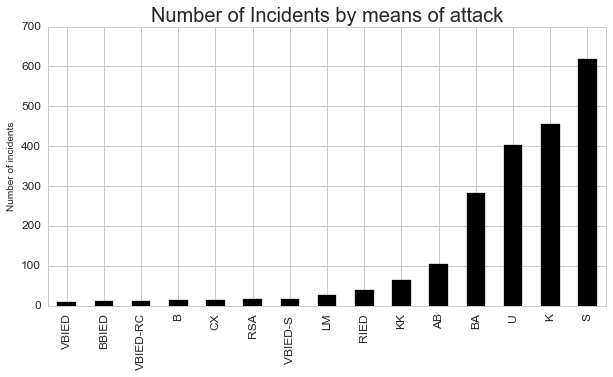

{
    u'AB': u'Aerial bombardment/missile/mortar/RPG/lobbed grenade',
    u'B': u'Bombing (set explosives with a stationary target: building, facility, home)',
    u'BA': u'Bodily assault/beating/stabbing with non-fire weapons or no weapons',
    u'BBIED': u'Body-borne IED',
    u'CX': u'Complex attack (explosives in conjunction with small arms)',
    u'K': u'Kidnapping (not killed)',
    u'KK': u'Kidnap-killing',
    u'LM': u'Landmine or UXO detonation',
    u'RIED': u'Roadside IED',
    u'RSA': u'Rape or serious sexual assault',
    u'S': u'Shooting (small arms / light weapons, e.g. pistols, rifles, machine guns)',
    u'U': u'Unknown',
    u'VBIED': u'Vehicle-born IED (unknown whether remote control or suicide)',
    u'VBIED-RC': u'Vehicle-borne IED (remote control detonation)',
    u'VBIED-S': u'Vehicle-borne IED (suicide)',
}


In [102]:
data, cat, title_text = d_crime,'Means of attack', 'Number of Incidents by means of attack'
l=data.groupby(cat).size()
plotdat(l, title_text)
plt.show()
pp(dict(dic_means_attack.items()))
 

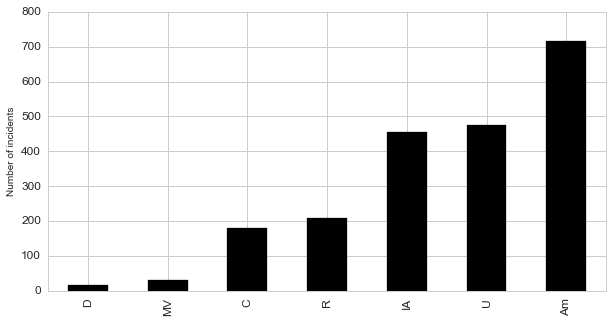

{
    u'Am': u'Ambush/attack on road',
    u'C': u' Combat (or police operations) / Crossfire',
    u'D': u'Detention (by official government forces or police, where abuse takes place)',
    u'IA': u'Individual attack or assassination',
    u'MV': u'Mob violence, rioting',
    u'R': u'Raid (armed incursion by group on home, office, or project site)',
    u'U': u'Unknown',
}


In [103]:
data, cat = d_crime,'Attack context'
l=data.groupby(cat).size()
plotdat(l)
plt.show()
pp(dict(dic_context_attack.items()))

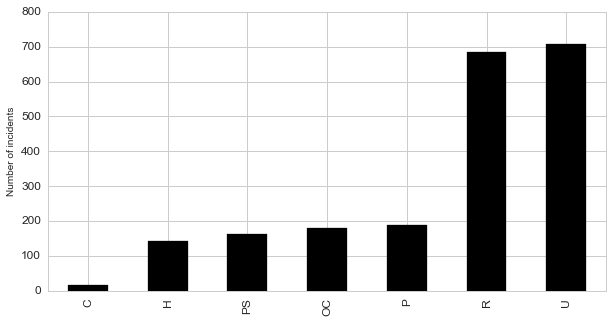

{
    u'C': u'Custody (official forces/police)',
    u'H': u'Home (private home, not compound)',
    u'OC': u'Office or organization compound/residence',
    u'P': u'Other public location (street, market, restaurant, etc.)',
    u'PS': u'Project site (village, camp, distribution point, hospital, etc.)',
    u'R': u'Road (in transit)',
    u'U': u'Unknown',
}


In [104]:
data, cat = d_crime,'Location'
l=data.groupby(cat).size()
plotdat(l)
plt.show()
pp(dict(dic_location.items()))

In [105]:
def cluster_2_column(d_crime,per, x, y):
    
    # Group by crime type and district 
    hoods_per_type=d_crime.groupby(y)[x].value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum.sort_values(inplace=True, ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum.sort_values(inplace=True)
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
# t=cluster_2_column(d_crime,0, )

In [106]:
t=cluster_2_column(d_crime,0, x='Location', y= 'Means of attack')

Cluster the non-normalized data across the top percentile reports and each `PdDistrict`.

Normalize verically across `PdDistrict`.

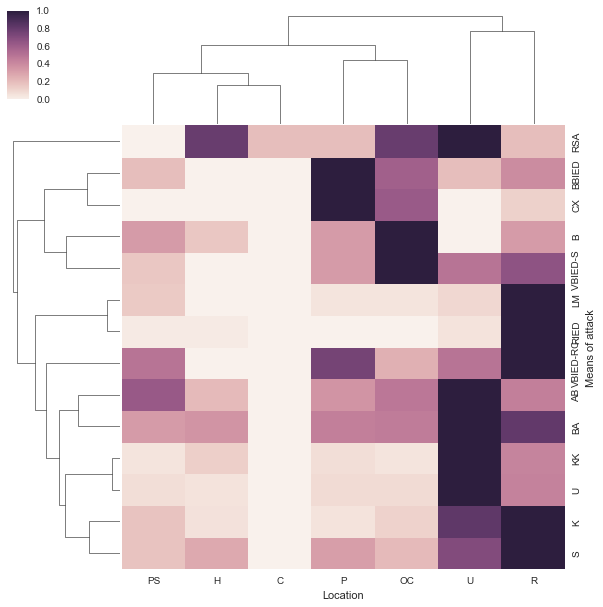

In [107]:
sns.clustermap(t,standard_scale=0);

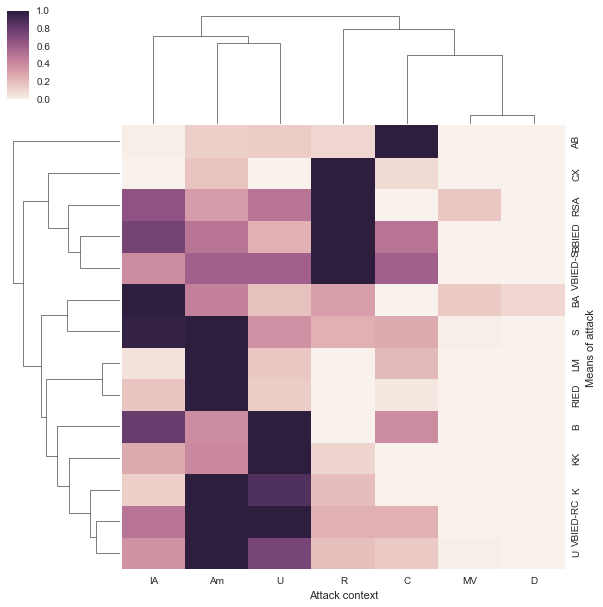

In [108]:
t=cluster_2_column(d_crime,0, x='Attack context', y= 'Means of attack')
sns.clustermap(t,standard_scale=0);

#### Conclusions

(1) Ambush attack on roads are the most common attack context.

(2) The most common form of attack are:

* Shooting (small arms / light weapons, e.g. pistols, rifles, machine guns)',
* Kidnapping (not killed)',
* Bodily assault/beating/stabbing with non-fire weapons or no weapons',
* or Unknown

## 2. Temporal Analysis

Data is verified only up to: December 31, 2015, hence filter out the incidents in 2016 to avoid bias in temporal analysis

In [28]:
d_crime = d_crime[d_crime.Year <= 2015]

#### General trend analysis

In [29]:
l=d_crime.groupby('Year')['Total killed'].sum()
plotdat(l, sortON = False, title_text ="Total killed aid workers over time", plot_type='line' )

NameError: name 'plotdat' is not defined

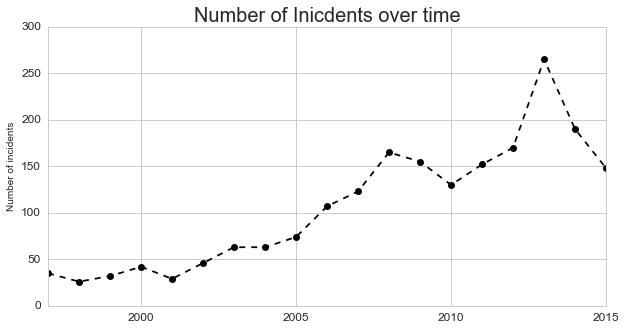

In [111]:
l=d_crime.groupby('Year').size()
plotdat(l, sortON = False, title_text ="Number of Inicdents over time",  plot_type='line')

In [112]:
l=d_crime.groupby('Year').sum()
l.head()

,Incident ID,Month,Day,UN,INGO,LNGO/NRCS,ICRC,IFRC,Other,Nationals killed,...,Internationals wounded,Internationals kidnapped,Total internationals,Total killed,Total wounded,Total kidnapped,Total affected,Gender Male,Gender Female,Gender Unknown
Year,,,,,,,,,,,,,,,,,,,,,
1997,630,245.0,265.0,22,31,10,9,0,1,31,...,2,20,30,39,6,28,73,19,3,51
1998,1282,145.0,176.0,21,11,8,26,2,0,31,...,1,17,22,35,15,18,68,15,2,41
1999,2512,191.0,150.0,17,31,13,7,0,0,27,...,1,18,25,33,15,20,68,9,0,59
2000,4851,241.0,210.0,31,45,5,9,0,1,46,...,3,7,21,57,23,11,91,18,0,73
2001,4379,183.0,137.0,28,48,2,11,1,0,21,...,3,19,28,27,20,43,90,13,1,66


#### Trend analysis by category: (1) attack context, (2) means of attack, (3) location when attacked

In [21]:
def savefigure(path):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('results/'+path, dpi=600)

In [22]:
matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)

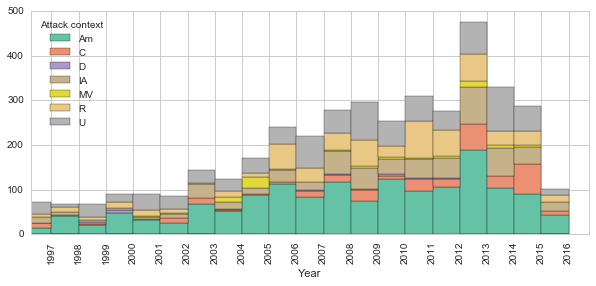

In [23]:
cat_per_time=d_crime.groupby(['Year', 'Attack context'])['Total affected'].sum()
cat_per_time.unstack(level=1).plot(kind='bar', stacked=True,width=1, fontsize=10, colormap='Set2');

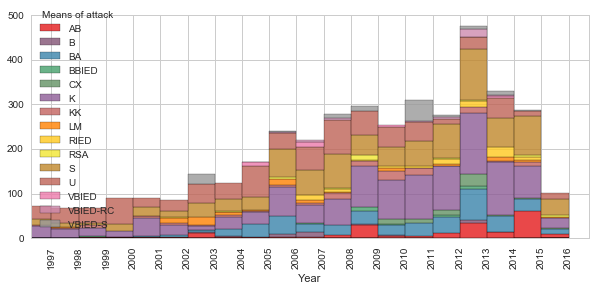

In [24]:
cat_per_time=d_crime.groupby(['Year', 'Means of attack'])['Total affected'].sum()
cat_per_time.unstack(level=1).plot(kind='bar', stacked=True,width=1, fontsize=10, colormap='Set1', alpha=.8);

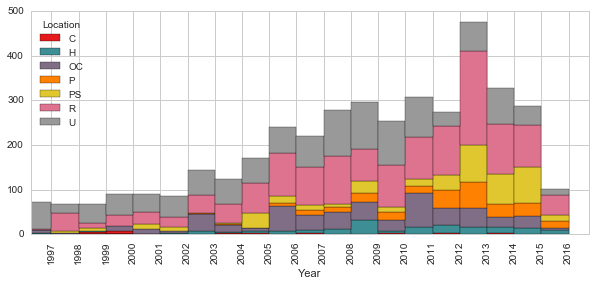

In [25]:
cat_per_time=d_crime.groupby(['Year', 'Location'])['Total affected'].sum()
cat_per_time.unstack(level=1).plot(kind='bar', stacked=True,width=1, fontsize=10, colormap='Set1', alpha=1)
savefigure('Location_Incident_temporal.png')

* Since 2013 the attacks on humanitarians at their Project site (village, camp, distribution point, hospital, etc.) has skyrocket


#### Exploration who is being affected?

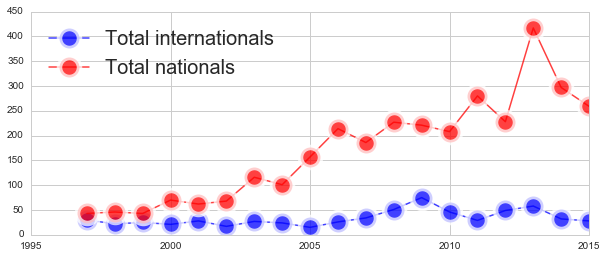

In [147]:
sns.set_context()
for d,c in zip(['Total internationals','Total nationals'],['b','r']):
    plt.plot(l.index,l[d],'o-',color=c,ms=20,mew=5.5,mec='white',linewidth=1.5,label=d,alpha=0.75)
plt.legend(loc='upper left',scatterpoints=1,prop={'size':20})
savefigure('Affected_nationals_vs_internations.png')

* Over the last fifteen years the Number of serious incidents has continously increased, the increase of attacks has primarily affected national humanitarian aid workers!


#### Exploration on the consequences of critical incident?

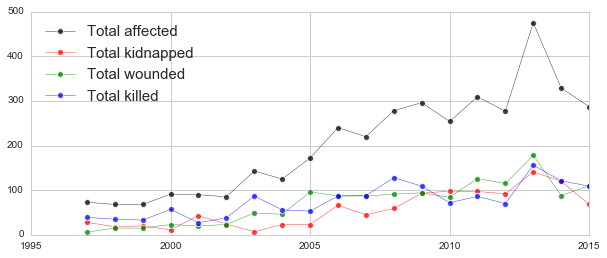

In [148]:
for d,c in zip(['Total affected','Total kidnapped', 'Total wounded', 'Total killed'],['k','r', 'g', 'b']):
    plt.plot(l.index,l[d],'o-',color=c,ms=6,mew=1,mec='white',linewidth=0.5,label=d,alpha=0.75)
plt.legend(loc='upper left',scatterpoints=1,prop={'size':15})
savefigure('Incident_Consequence.png')

#### Conclusion

* There is not seperate trend towards more kidnapping, more deatly incident.

## 3. Spatial Analysis

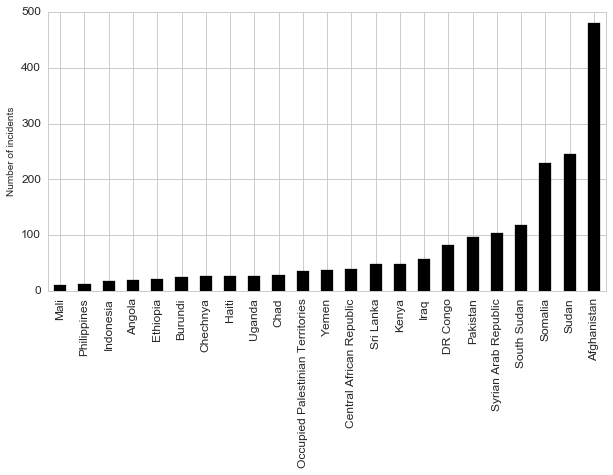

In [29]:
l = d_crime.groupby('Country').size()
l = l[l>10] # More than 10 incidents 
plotdat(l, title_text='', sortON=True, plot_type="bar")

In [30]:
len(d_crime[d_crime['Country']== 'Afghanistan'])

481

In [31]:
from IPython.display import HTML
HTML('<iframe width="100%" height="520" frameborder="0" src="https://philippschw.carto.com/viz/da5caf7f-8ef3-47f2-aba9-8f5b7397a28a/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

In [32]:
HTML('<iframe width="100%" height="520" frameborder="0" src="https://philippschw.carto.com/viz/3dbcbef9-e81e-4180-a56b-e57729a3d59e/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

In [33]:
HTML('<iframe width="100%" height="520" frameborder="0" src="https://philippschw.carto.com/viz/82b5fcb0-8a89-11e6-8881-0e8c56e2ffdb/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')